In [1]:
import gym
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import time

from IPython.display import clear_output

In [3]:
env = gym.make('Taxi-v3')

action_space_size = env.action_space.n
obs_space_size = env.observation_space.n

q_table = np.zeros((obs_space_size, action_space_size))

games_to_play = 10000

learning_rate = 0.1
discount_rate = 0.6

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_rate_decay = 0.0005

In [5]:
obs_space_size,action_space_size

(500, 6)

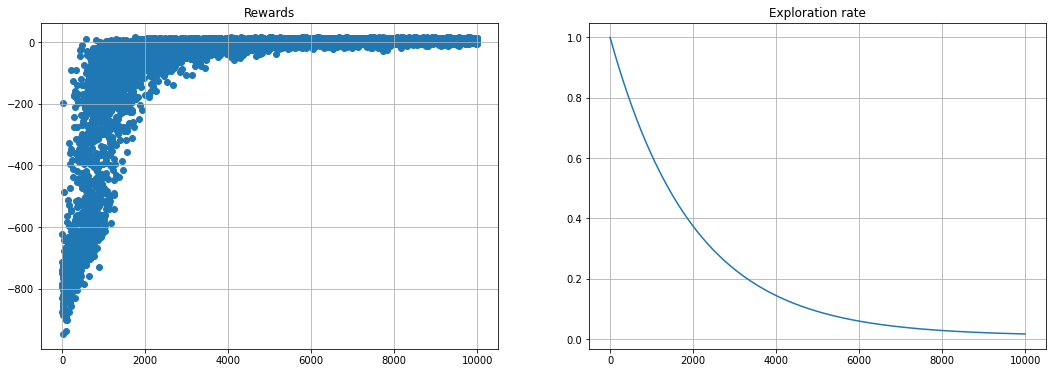

In [6]:
rewards = []
exploration_rates = []

for episode in range(games_to_play):
    state = env.reset()
    temp_reward = 0
    
    exploration_rates.append(exploration_rate)
    
    while True:
        thresh = np.random.uniform(0, 1)
        if thresh > exploration_rate:
            action = np.argmax(q_table[state, :])
        else:
            action = env.action_space.sample()
        
        new_state, reward, done, info = env.step(action)
        
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        
        state = new_state
        temp_reward += reward
        
        if done:
            break
            
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(- exploration_rate_decay * episode)
    
    rewards.append(temp_reward)
    
rewards_per_thousand_episodes = np.split(np.array(rewards), games_to_play / 1000)
count = 1000

# print('******Average reward per thousand episodes******\n')
# for r in rewards_per_thousand_episodes:
#     print(f'{count}: {sum(r/1000)}')
#     count += 1000
    
plt.figure(figsize = (18, 6))

plt.subplot(121)
plt.scatter(range(games_to_play), rewards)
plt.title('Rewards')
plt.grid()

plt.subplot(122)
plt.plot(range(games_to_play), exploration_rates)
plt.title('Exploration rate')
plt.grid()

plt.show()

In [7]:
for i in range(10):
    total_reward = 0
    state = env.reset()
    
    while True:
        clear_output(wait = True)
        print(f'Episode {i+1}')
        
        env.render()
        action = np.argmax(q_table[state])
        state, reward, done, debug = env.step(action)
        total_reward += reward
        print(f'Step reward: {reward}')
        print(f'Total reward: {total_reward}')
        
        time.sleep(0.3)
        
        if done:
            print('Episode done')
            time.sleep(2)
            break

Episode 10
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Step reward: 20
Total reward: 9
Episode done
